# SPECTRAL ROLLOFF

It defines the shape of the signal,It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies(0.85 is by default when value is not defined using the spectral rolloff module of librosa).
This can also be used to, approximate the maximum (or minimum) frequency by setting roll_percent to a value close to 1 (or 0).

In [1]:
import librosa as lr
import librosa.display
import matplotlib.pyplot as plt
import sklearn.preprocessing 
import matplotlib.style as ms
%matplotlib inline
import numpy as np
import os

Visualizing the roll off frequency and power spectrum,

In [2]:
audio='/home/vivek/Genre_Detection/genres/metal/metal.00001.au'
x , sr =lr.load(audio)

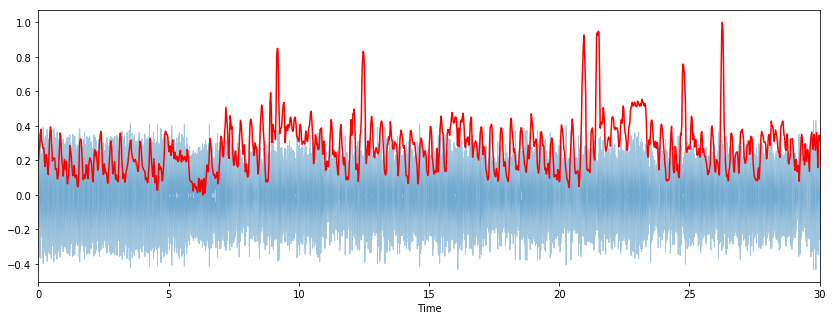

In [3]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr,roll_percent=0.85)[0]

frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

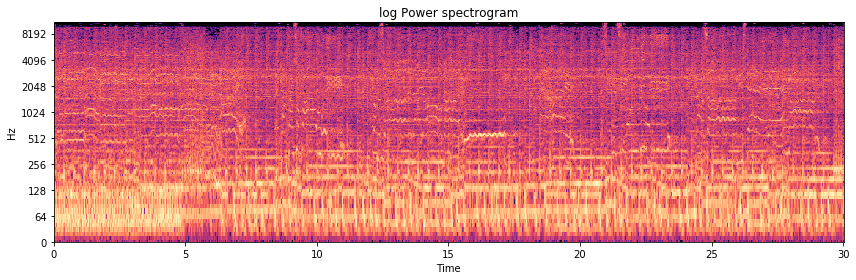

In [5]:
S, phase = librosa.magphase(librosa.stft(x))
plt.figure(figsize=(12,4))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()

In [6]:
#mean of the spectral rolloff acts as a good feature for training the model and predicting it
np.mean(spectral_rolloff)

6037.074141712587